In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:459: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:461: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:466: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:468: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

In [9]:
import importlib
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:459: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:461: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:466: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:468: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py'>

In [4]:
from datetime import datetime

def plot_rates(dataset, data_prefix, n_file, bc, rates, ax=None):
    dir = rf'/Volumes/LaCie/dm_data/{dataset}'
    file = os.path.join(dir, f'{data_prefix}0.hdf5')
    f = h5py.File(file, 'r')
    start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
    f.close()

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(bc, rates[0], '-', color=yale_colors[0], label='All', alpha=1)
    ax.plot(bc, rates[1], '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
    ax.plot(bc, rates[2], '-', color=yale_colors[2], label='Detection quality + noise cut', alpha=1)
    ax.plot(bc, rates[3], '-', color=yale_colors[3], label='Detection quality + noise + anti-coincidence cut', alpha=1)

    # ax.legend(frameon=False, fontsize=12)

    ax.set_yscale('log')
    ax.set_xlim(0, 10000)
    ax.set_ylim(1e-7, 100)

    # ax.set_xlabel('Recon. amplitude (keV)')
    # ax.set_ylabel('Differential count (Hz/keV)')
    # ax.set_title(f'Data ({n_file/60:.1f} hours), begins {start_time}')

In [ ]:
def calc_average_pressure(dataset, data_prefix, nfile):
    pp = np.empty(nfile)
    for i in range(nfile):
        data_dir = rf'/Volumes/LaCie/dm_data/{dataset}'
        file = os.path.join(data_dir, f'{data_prefix}{i}.hdf5')

        f = h5py.File(file, "r")
        p = f['data'].attrs['pressure_mbar']

        pp[i] = p
    return np.mean(pp)

In [169]:
datasets = ['20241202_8e-8mbar_long',
           '20241204_2e-8mbar_8e_aftercal_long',
           '20241205_2e-8mbar_0e_aftercal_long',
           '20241206_1e-8mbar_0e_aftercal_long',
           '20241207_1e-8mbar_1e_aftercal_long',
           '20241208_1e-8mbar_1e_aftercal_long',
           '20241210_1e-8mbar_8e_alignment1_long',
           '20241210_1e-8mbar_8e_alignment2_long_nodrive',
           '20241210_1e-8mbar_8e_alignment2_long_withdrive',
           '20241211_1e-8mbar_8e_alignment2_long_nodrive',
           '20241212_1e-8mbar_8e_alignment2_long_nodrive',
           '20241213_1e-8mbar_0e_alignment2_long',
           '20241214_1e-8mbar_0e_alignment2_long',
           '20241215_9e-9mbar_0e_alignment2_long',
           '20241216_5e-8mbar_0e_alignment2_long',
           '20241217_6e-8mbar_0e_alignment3_long'
           ]

data_prefixs = ['20241202_abcd_',
                '20241204_abcd_',
                '20241205_d_',
                '20241206_d_',
                '20241207_d_',
                '20241208_d_',
                '20241210_d_',
                '20241210_d_',
                '20241210_d_',
                '20241211_d_',
                '20241212_d_',
                '20241213_d_',
                '20241214_d_',
                '20241215_d_',
                '20241216_d_',
                '20241217_d_'
                ]

n_files = [1440, 1440, 1440, 1440, 1440, 821, 640, 1440, 181, 1418, 917, 1169, 1565, 1440, 1164, 601]

bc, scaling = None, None
hhs, rates, n_windows = [], [], []
for i, dataset in enumerate(datasets):
    data_dir = f'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
    
    _bc, _hhs, _rates, _n, _scaling = utils.get_summed_rates(data_dir, dataset)
    hhs.append(_hhs)
    rates.append(_rates)
    n_windows.append(_n)

    if bc is None:
        bc = _bc
    if scaling is None:
        scaling = _scaling


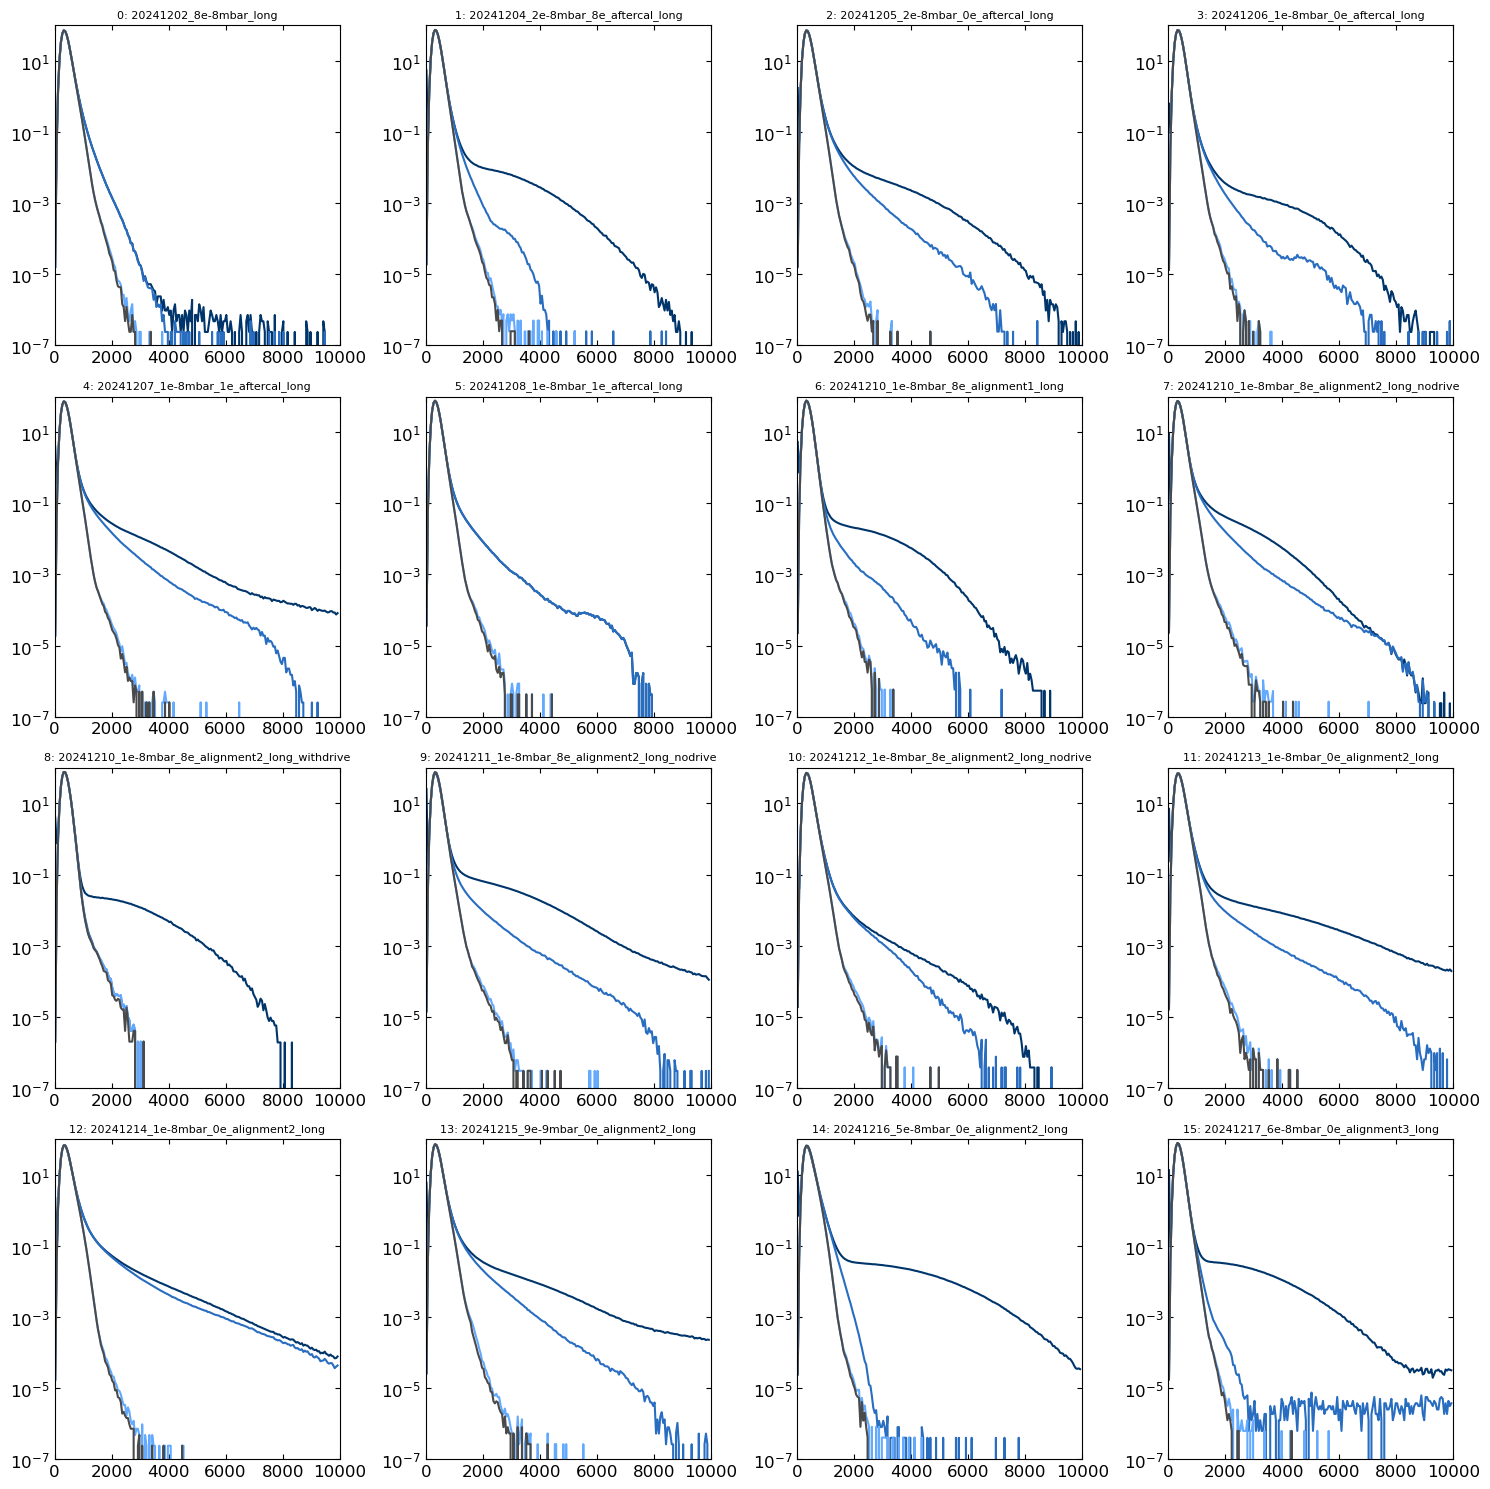

In [170]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i in range(len(datasets)):
    ax = axes.flatten()[i]
    plot_rates(datasets[i], data_prefixs[i], n_files[i], bc, rates[i], ax)
    ax.set_title(f'{i}: {datasets[i]}', fontsize=8)

fig.tight_layout()

Text(0, 0.5, 'Differential count (Hz/keV)')

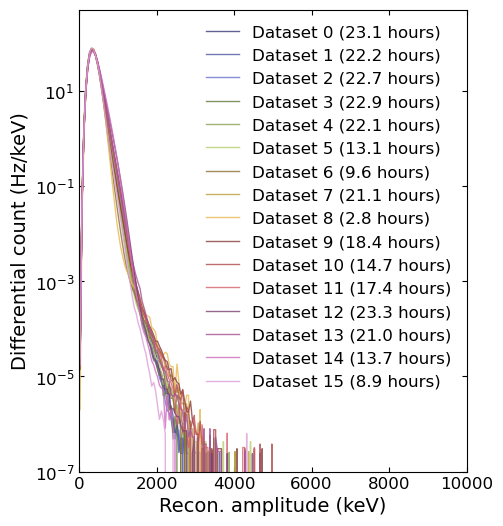

In [171]:
colors = plt.colormaps.get_cmap('tab20b').resampled(len(datasets)).colors
fig, ax = plt.subplots(figsize=(5, 6))

n_search_per_win = (5000 - 150) / 25
time_per_search = 2e-6 * 25
scaling = n_search_per_win * time_per_search * 50  # because of the 50 keV bins

times = [n[-1] * n_search_per_win * time_per_search / 3600 for n in n_windows] # Time in hours for each dataset (aftercut)

for i in range(len(datasets)):
    ax.plot(bc, rates[i][-1], '-', color=colors[i], label=f'Dataset {i} ({times[i]:.1f} hours)', alpha=0.8, linewidth=1)

ax.legend(frameon=False, fontsize=12)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 10000)
ax.set_ylim(1e-7, 500)

ax.set_xlabel('Recon. amplitude (keV)')
ax.set_ylabel('Differential count (Hz/keV)')

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_77951/3625664194.py:22: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, utils.gauss(xx, gaus_amp/(popt[0] * np.sqrt(2*np.pi)), 0, popt[0]), '--', color='#DC3220', label=f'$\sigma$ = {popt[0]:.1f} keV/c')


Text(0, 0.5, 'Differential count (Hz/keV/c)')

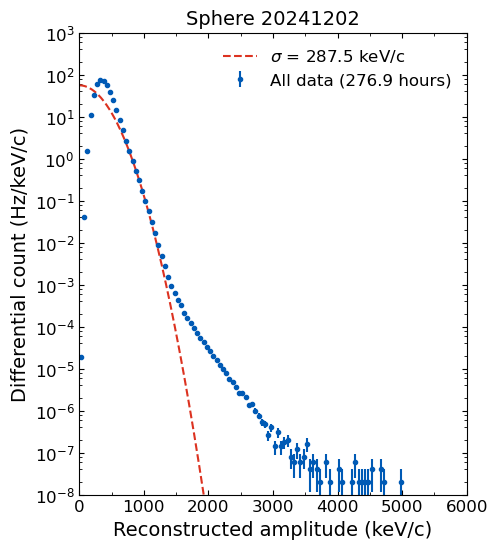

In [226]:
hh_sum = np.sum(np.asarray(hhs), axis=0)
n_window_sum = np.sum(np.asarray(n_windows), axis=0)
time_sum = np.sum(np.asarray(times))

from matplotlib.ticker import LogLocator, NullFormatter, MultipleLocator
from scipy.optimize import curve_fit

fig, ax = plt.subplots(figsize=(5, 6))
ax.errorbar(bc, hh_sum[3] / (n_window_sum[3] * scaling), yerr=np.sqrt(hh_sum[3])/(n_window_sum[3]*scaling), fmt='.', color='#005AB5', label=f'All data ({time_sum:.1f} hours)', alpha=1)

# Factor of 2 because we only have half of a Gaussian
gaus_amp = 2 * 1 / (2e-6 * 25)  # (1 s)/(time per search)
sigma = 282

fit_lb, fit_ub = 750, 1500
idx_fit = np.logical_and(bc > fit_lb, bc < fit_ub)
popt, pcov = curve_fit(lambda x, b: utils.gauss(x, gaus_amp/(sigma * np.sqrt(2*np.pi)), 0, b), 
                       bc[idx_fit], (hh_sum[3]/(n_window_sum[3] * scaling))[idx_fit], p0=[280])

xx = np.linspace(0, 3000, 500)
# ax.plot(xx, utils.gauss(xx, gaus_amp/(sigma * np.sqrt(2*np.pi)), 0, sigma), '--', color='#DC3220', label=f'$\sigma$ = {sigma} keV/c')
ax.plot(xx, utils.gauss(xx, gaus_amp/(popt[0] * np.sqrt(2*np.pi)), 0, popt[0]), '--', color='#DC3220', label=f'$\sigma$ = {popt[0]:.1f} keV/c')

ax.legend(frameon=False, fontsize=12)

ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlim(0, 6000)
ax.set_ylim(1e-8, 1000)

ax.set_yticks(np.logspace(-8, 3, 12))
locmin = LogLocator(base=10.0, subs=(0.2, 0.4, 0.6, 0.8), numticks=15)
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(NullFormatter())

ax.set_title('Sphere 20241202')
ax.set_xlabel('Reconstructed amplitude (keV/c)')
ax.set_ylabel('Differential count (Hz/keV/c)')

In [133]:
pavg_hists_0 = calc_average_pressure(datasets[0], data_prefixs[0], n_files[0])
pavg_hists_2 = calc_average_pressure(datasets[2], data_prefixs[2], n_files[2])
pavg_hists_14 = calc_average_pressure(datasets[14], data_prefixs[14], n_files[14])

print(pavg_hists_0, pavg_hists_2, pavg_hists_14)

5.974444444444445e-08 1.2409027777777776e-08 6.89810996563574e-08


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_77951/2136682977.py:5: SyntaxWarning: invalid escape sequence '\p'
  axes[0,0].plot(bc, rates[2][-1], '-', color='#C7C7C7', label=f'($1.2 \pm 0.6) \\times 10^{{-8}}$ mbar', alpha=1)
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_77951/2136682977.py:7: SyntaxWarning: invalid escape sequence '\p'
  fmt='.', color=colors[0], label=f'$(6.0 \pm 3.0) \\times 10^{{-8}}$ mbar', alpha=0.75)


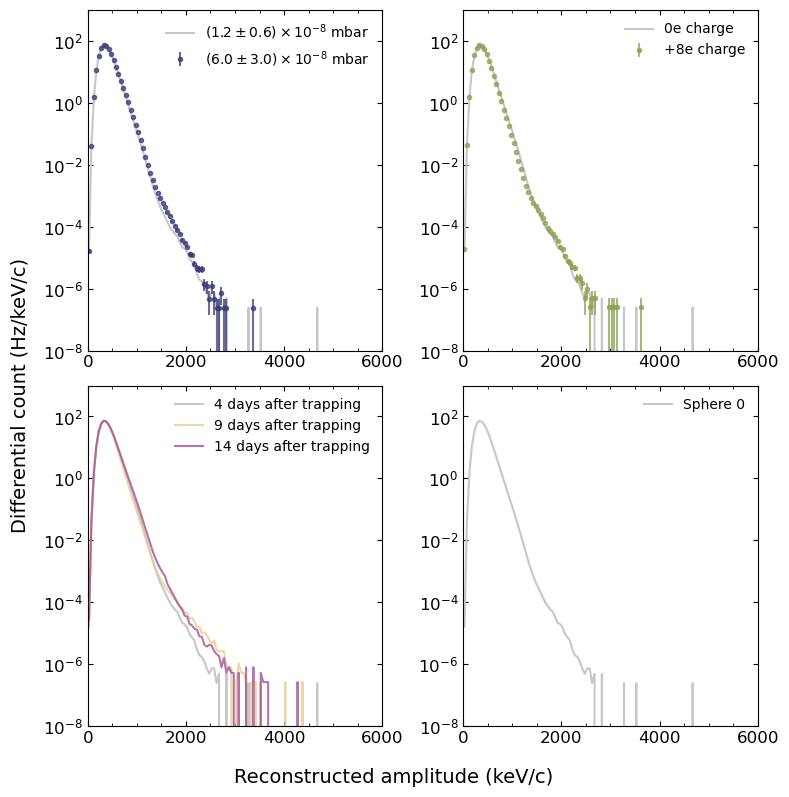

In [225]:
colors = plt.colormaps.get_cmap('tab20b').resampled(8).colors

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0,0].plot(bc, rates[2][-1], '-', color='#C7C7C7', label=f'($1.2 \pm 0.6) \\times 10^{{-8}}$ mbar', alpha=1)
axes[0,0].errorbar(bc, rates[0][-1], yerr=np.sqrt(hhs[0][-1])/(n_windows[0][-1] * scaling), 
                   fmt='.', color=colors[0], label=f'$(6.0 \pm 3.0) \\times 10^{{-8}}$ mbar', alpha=0.75)

axes[0,1].plot(bc, rates[2][-1], '-', color='#C7C7C7', label=f'0e charge', alpha=1)
axes[0,1].errorbar(bc, rates[1][-1], yerr=np.sqrt(hhs[1][-1])/(n_windows[1][-1] * scaling), 
                   fmt='.', color=colors[2], label=f'+8e charge', alpha=0.75)
# axes[0,1].errorbar(bc, rates[10][-1], yerr=np.sqrt(hhs[9][-1])/(n_windows[10][-1] * scaling), 
#                    fmt='.', color=colors[2], label=f'+8e charge', alpha=1)

axes[1,0].plot(bc, rates[2][-1], '-', color='#C7C7C7', label=f'4 days after trapping', alpha=1)
axes[1,0].plot(bc, rates[7][-1], '-', color=colors[4], label=f'9 days after trapping', alpha=0.8)
axes[1,0].plot(bc, rates[13][-1], '-', color=colors[6], label=f'14 days after trapping', alpha=0.8)

axes[1,1].plot(bc, rates[2][-1], '-', color='#C7C7C7', label=f'Sphere 0', alpha=1)


for ax in axes.flatten():
    ax.legend(frameon=False, fontsize=10, loc='upper right')
    ax.set_yscale('log')
    ax.minorticks_on()

    ax.set_xlim(0, 6000)
    ax.set_ylim(1e-8, 1000)

fig.supxlabel('Reconstructed amplitude (keV/c)', fontsize=14)
fig.supylabel('Differential count (Hz/keV/c)', fontsize=14)
fig.tight_layout()

## Bin histograms into sidereal time

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-12-02 15:18:36.483867'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

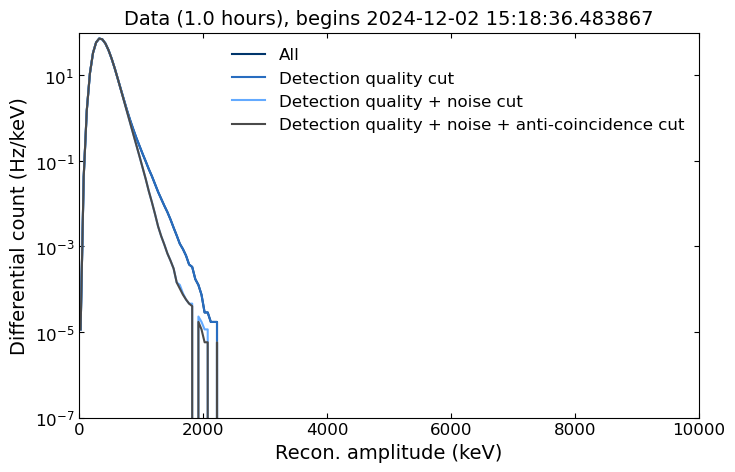

In [ ]:
dataset = '20241202_1_7e-7mbar_1hour'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'

bc, hhs_0, rates_0, n0, scaling = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 60, bc, rates_0)

In [ ]:
data_prefix = r'20241202_abcd_'
hists_0 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

events_after_cut_0 = utils.get_events_after_cut(hists_0, thr=1800)
print('Number of windows with large events: ', len(events_after_cut_0))

Number of windows with large events:  15


/Volumes/LaCie/dm_data/20241202_1_7e-7mbar_1hour/20241202_abcd_49.hdf5
/Volumes/LaCie/dm_data/20241202_1_7e-7mbar_1hour/20241202_abcd_53.hdf5
/Volumes/LaCie/dm_data/20241202_1_7e-7mbar_1hour/20241202_abcd_53.hdf5
/Volumes/LaCie/dm_data/20241202_1_7e-7mbar_1hour/20241202_abcd_54.hdf5
/Volumes/LaCie/dm_data/20241202_1_7e-7mbar_1hour/20241202_abcd_58.hdf5


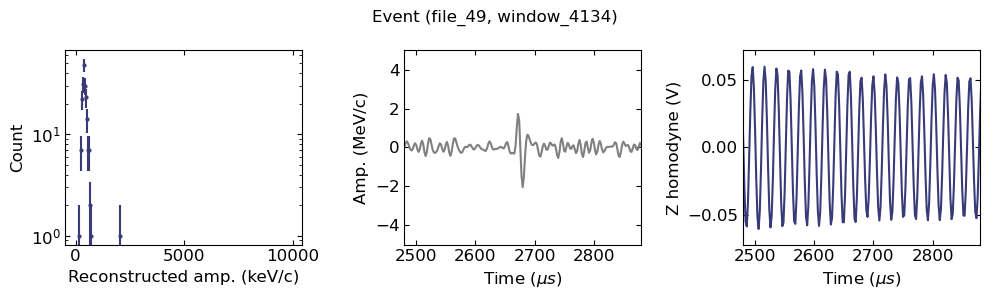

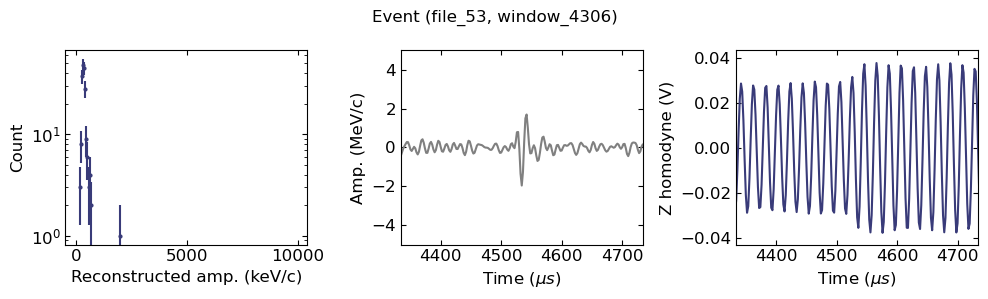

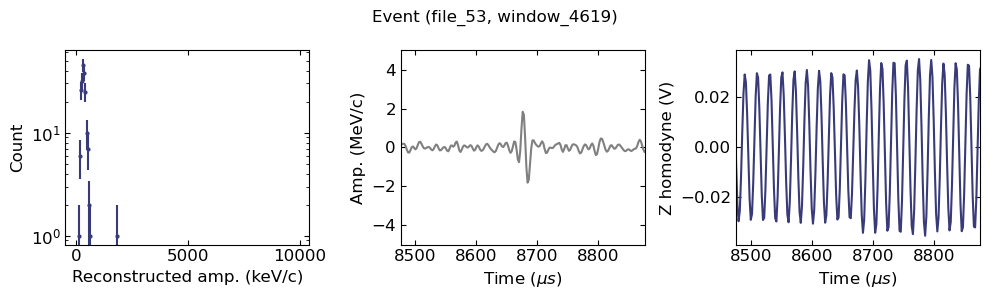

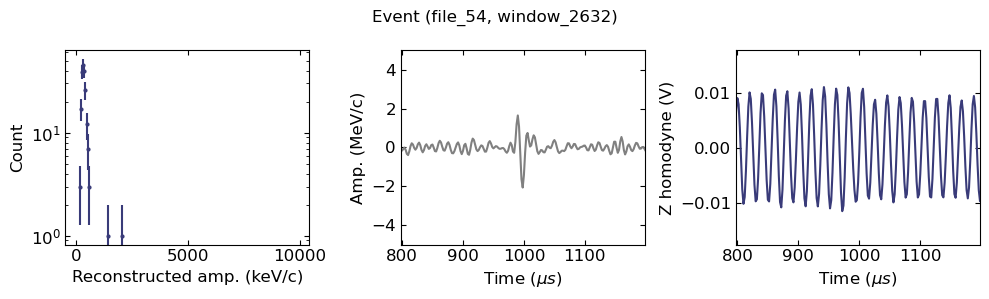

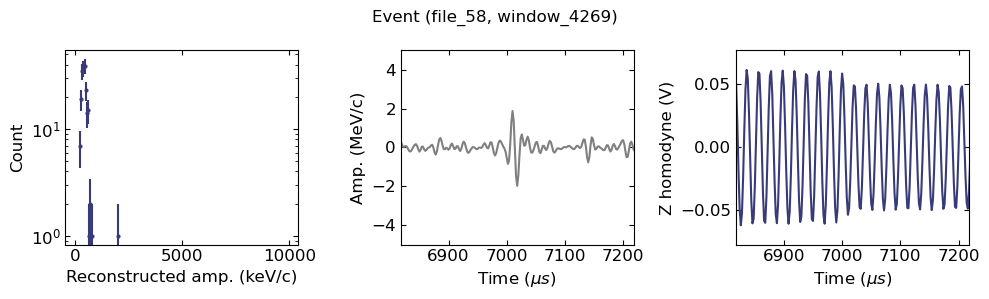

In [13]:
c_mv = 5.522e-08
amp2kev = 6778.383671306627

window_length = 5000
bins = np.arange(0, 10000, 50)
bc = 0.5 * (bins[:-1] + bins[1:])

for i, j in events_after_cut_0[-5:]:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-02 17:45:55.246328'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

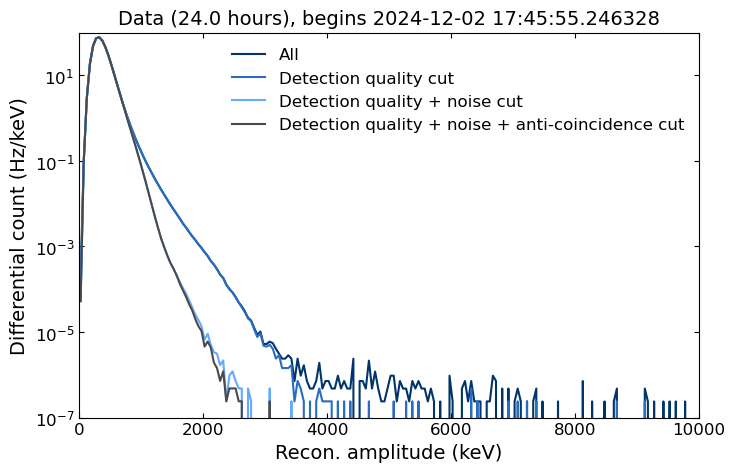

In [134]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241202_8e-8mbar_long'
data_prefix = r'20241202_abcd_'
dataset = '20241202_8e-8mbar_long'

bc, hhs_1, rates_1, n1, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_1)

The events in the non-Gaussian tail above ~1.5 MeV are basically all kicks

In [ ]:
hists_1= utils.load_data_hists(data_dir, data_prefix, 1440, 1600)

events_after_cut_1 = utils.get_events_after_cut(hists_1, thr=2000)
print('Number of windows with large events: ', len(events_after_cut_1))

Number of windows with large events:  3808


/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_11.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_11.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_11.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_12.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_12.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_12.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_12.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_13.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_13.hdf5
/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_14.hdf5


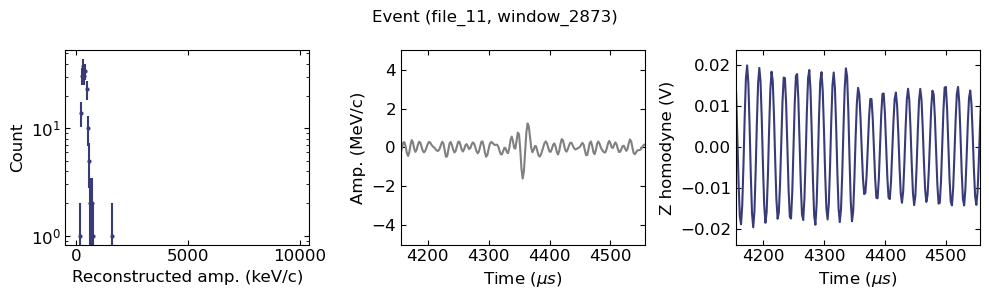

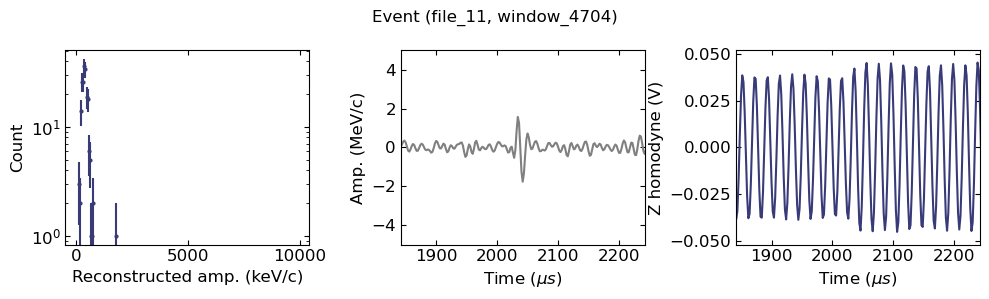

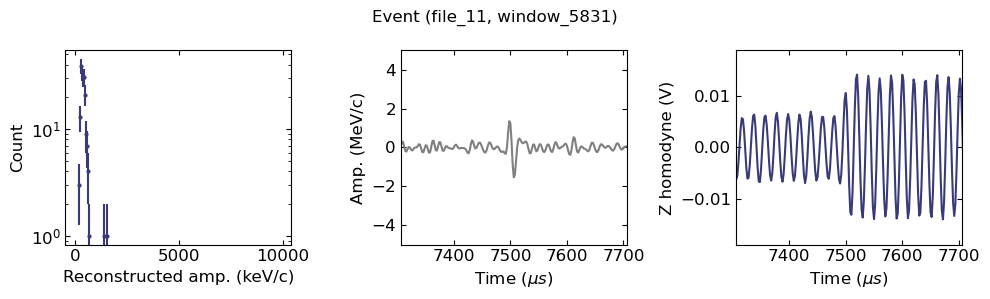

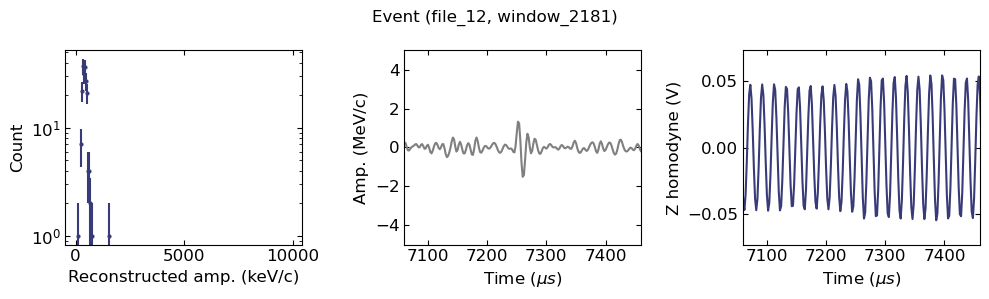

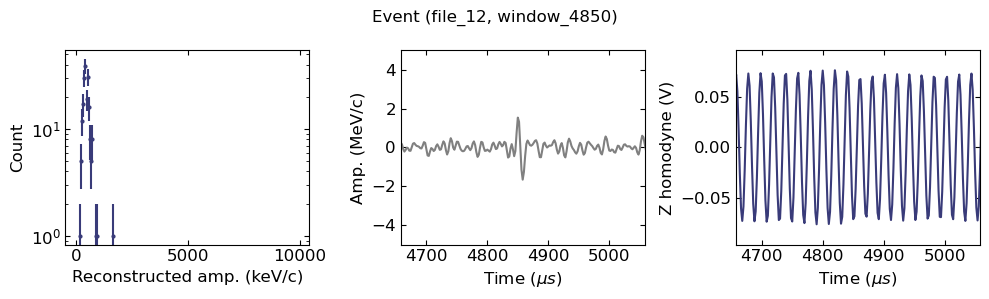

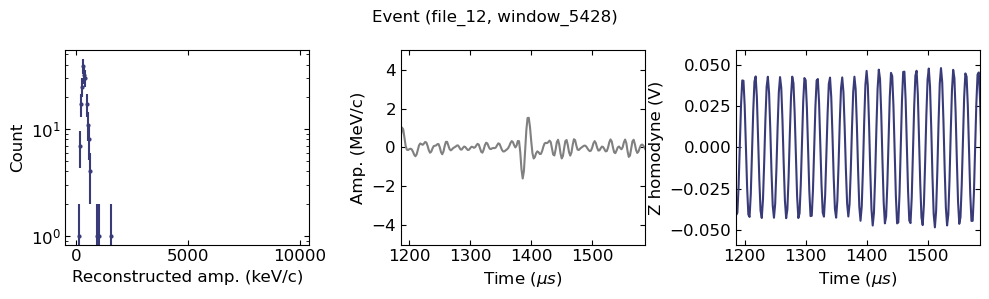

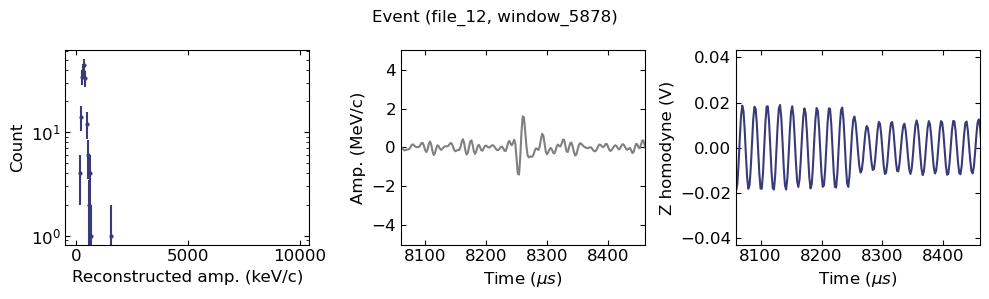

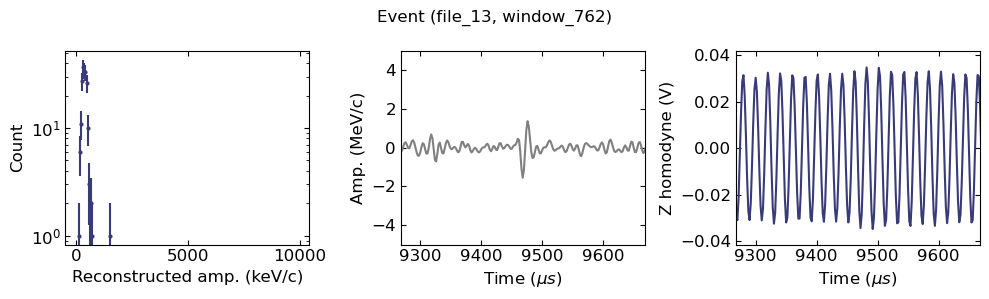

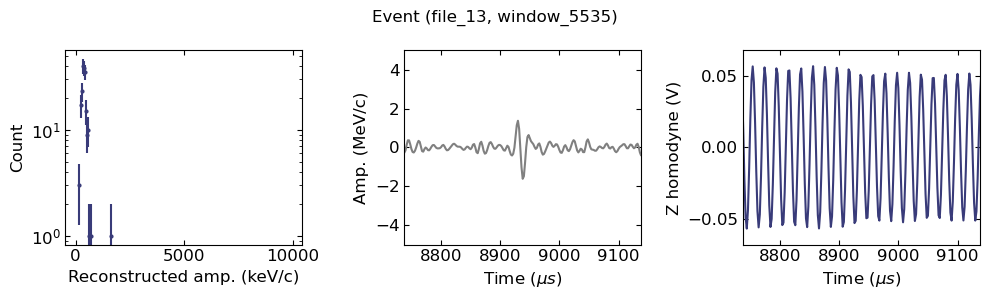

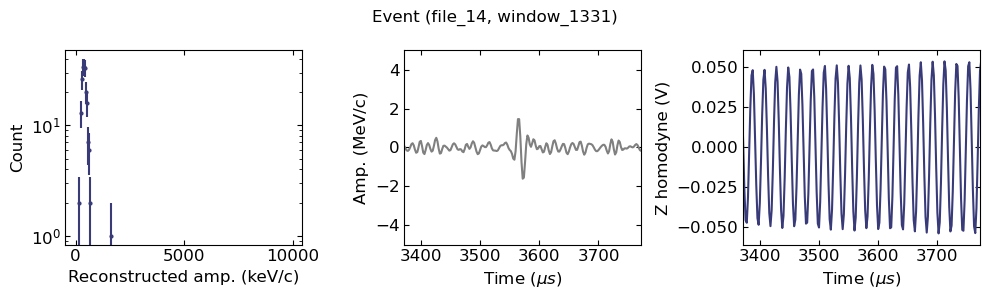

In [16]:
data_prefix = r'20241202_abcd_'
dataset = '20241202_8e-8mbar_long'

for i, j in events_after_cut_1[10:20]:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

/Volumes/LaCie/dm_data/20241202_8e-8mbar_long/20241202_abcd_562.hdf5


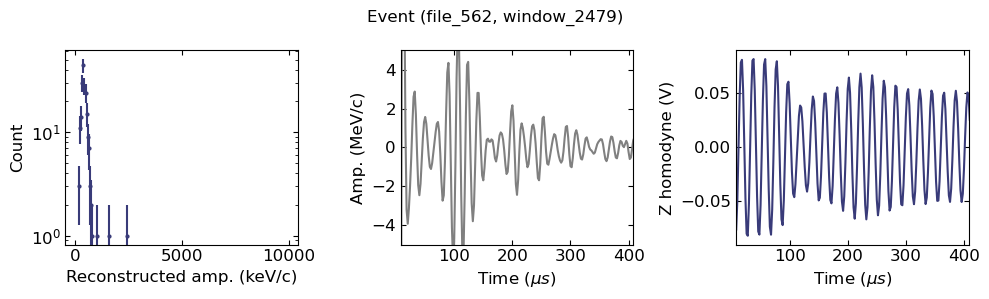

In [17]:
# Fort this particular event, data < 200 us are not searched for 
# so the apparent burst is not effectively cut out

i, j = 562, 2479
amp_lp, hh, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-04 12:15:41.822880'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

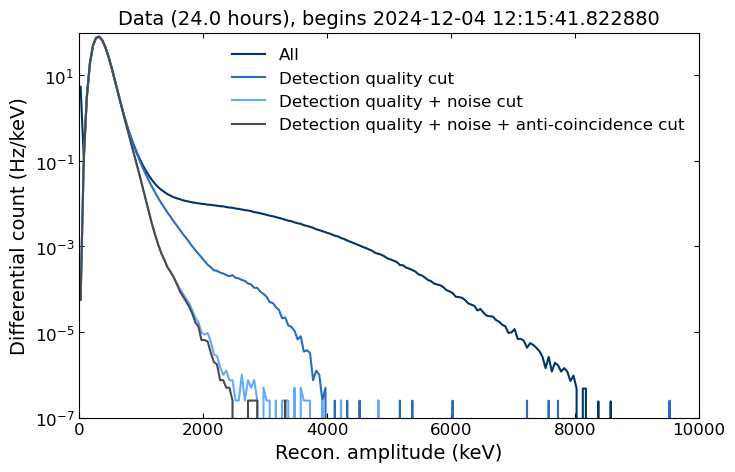

In [90]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241204_2e-8mbar_8e_aftercal_long'
data_prefix = r'20241204_abcd_'
dataset = '20241204_2e-8mbar_8e_aftercal_long'

bc, hhs_2, rates_2, n2, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_2)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-05 17:03:19.220695'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

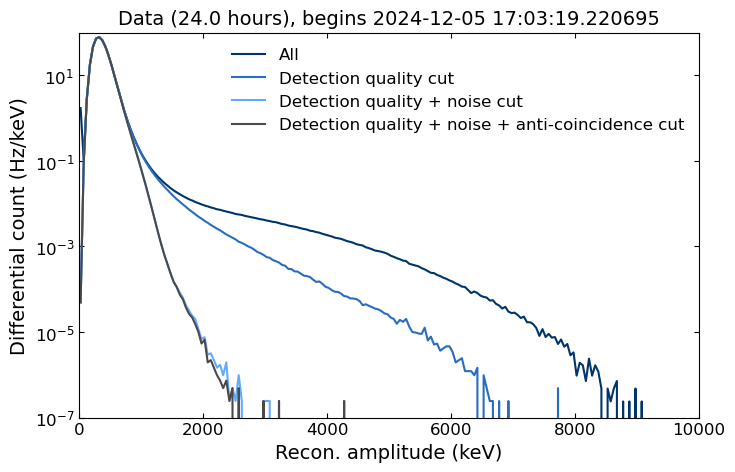

In [151]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241205_2e-8mbar_0e_aftercal_long'
data_prefix = r'20241205_d_'
dataset = '20241205_2e-8mbar_0e_aftercal_long'

bc, hhs_3, rates_3, n3, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_3)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-06 18:07:34.075848'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

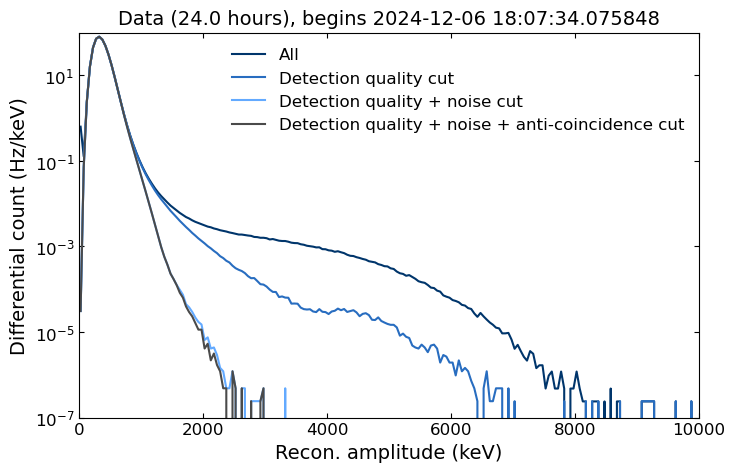

In [92]:
dataset = '20241206_1e-8mbar_0e_aftercal_long'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241206_d_'

bc, hhs_4, rates_4, n4, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_4)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-07 19:11:56.827554'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

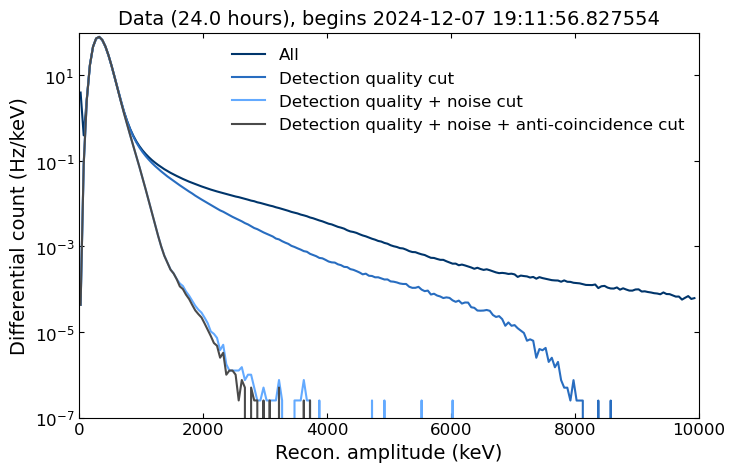

In [93]:
dataset = '20241207_1e-8mbar_1e_aftercal_long'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241207_d_'

bc, hhs_5, rates_5, n5, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_5)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (13.7 hours), begins 2024-12-08 19:58:17.588239'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

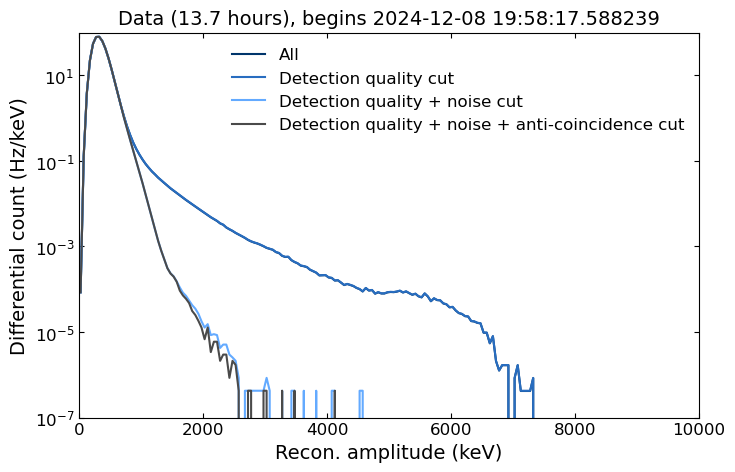

In [94]:
dataset = '20241208_1e-8mbar_1e_aftercal_long'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241208_d_'

bc, hhs_6, rates_6, n6, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 821, bc, rates_6)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (3.0 hours), begins 2024-12-10 11:35:16.640170'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

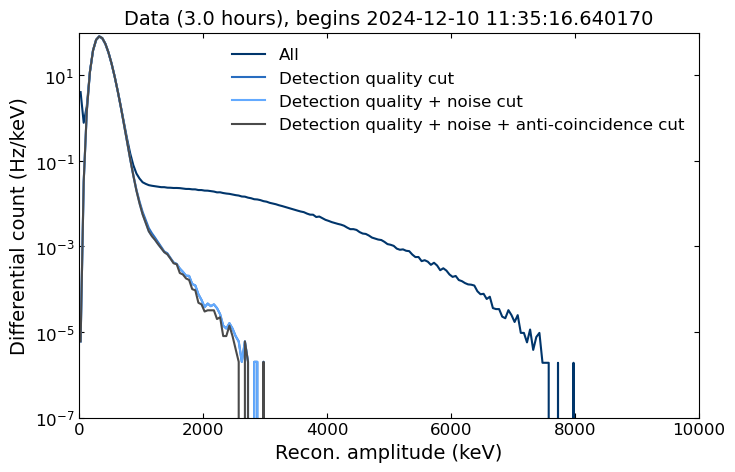

In [95]:
dataset = '20241210_1e-8mbar_8e_alignment2_long_withdrive'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241210_d_'

bc, hhs_8, rates_8, n8, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 180, bc, rates_8)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (24.0 hours), begins 2024-12-10 14:54:41.205294'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

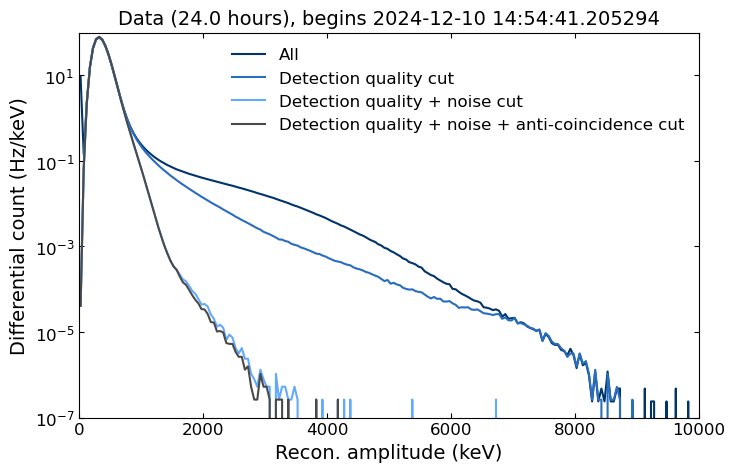

In [156]:
dataset = '20241210_1e-8mbar_8e_alignment2_long_nodrive'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241210_d_'

bc, hhs_9, rates_9, n9, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1440, bc, rates_9)

In [158]:
hists_9= utils.load_data_hists(data_dir, data_prefix, 1440, 1600)

events_after_cut_9 = utils.get_events_after_cut(hists_9, thr=2000)
print('Number of windows with large events: ', len(events_after_cut_9))

Number of windows with large events:  596


/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1428.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1429.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1429.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1431.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1433.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1433.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1434.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1435.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1436.hdf5
/Volumes/LaCie/dm_data/20241210_1e-8mbar_8e_alignment2_long_nodrive/20241210_d_1439.hdf5


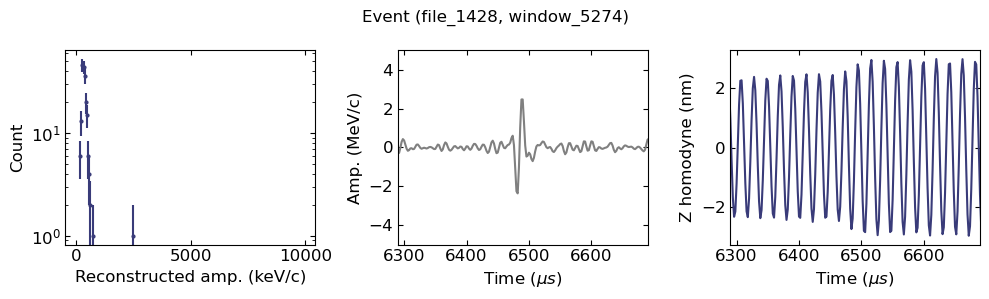

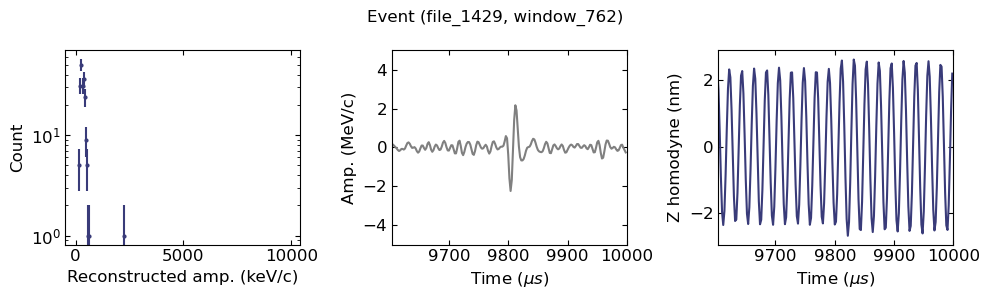

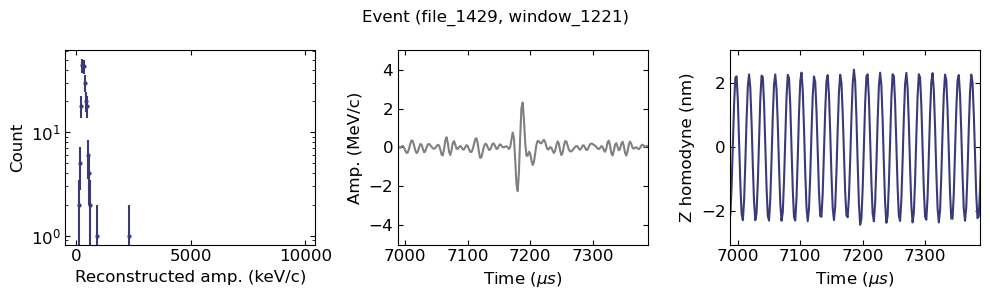

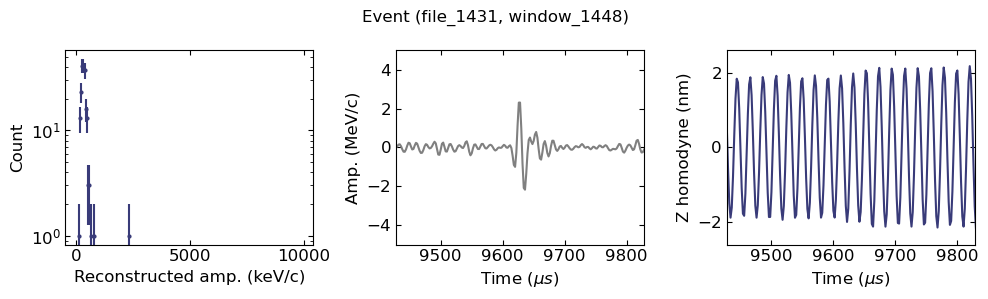

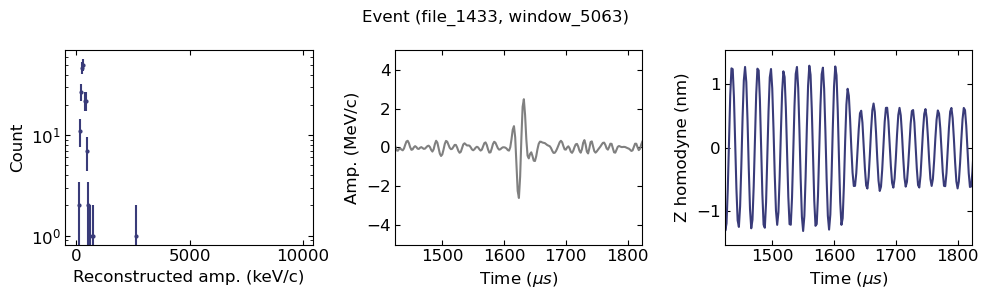

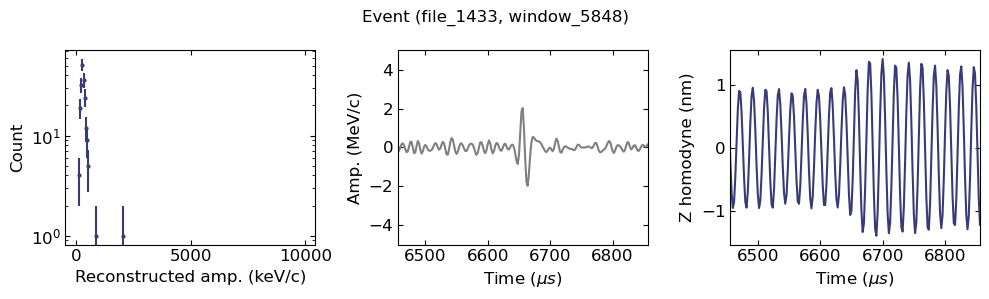

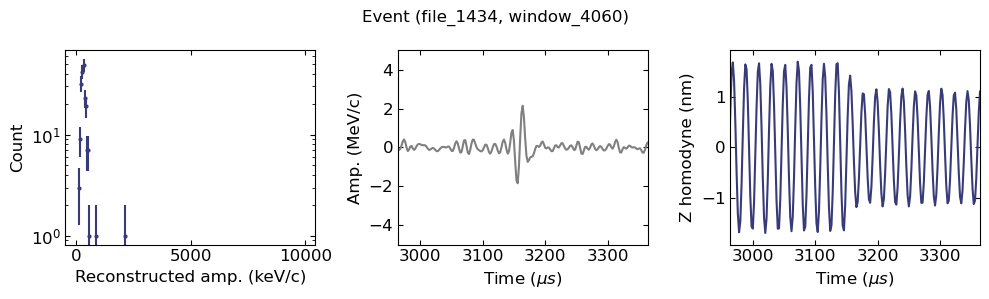

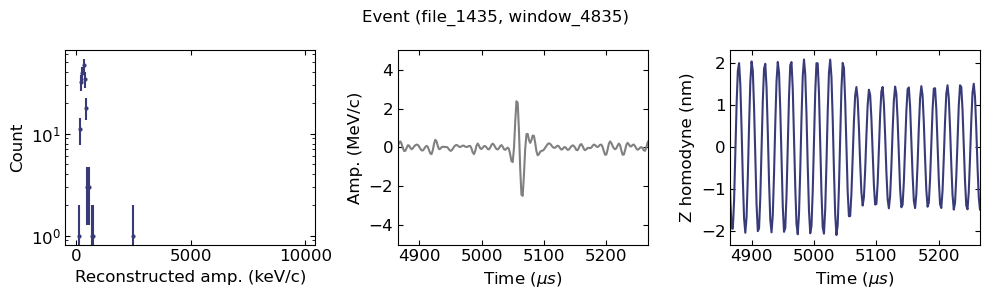

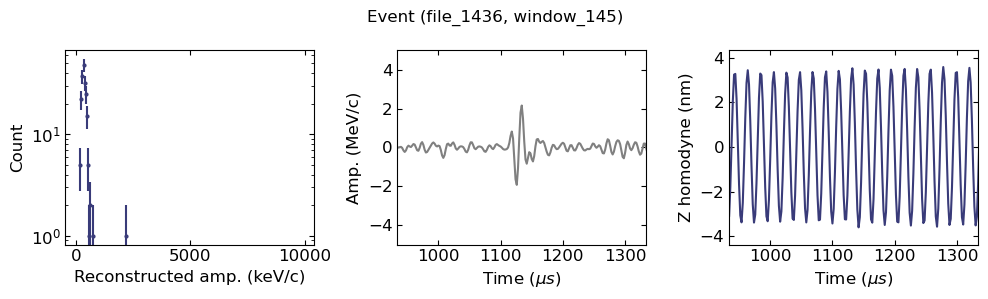

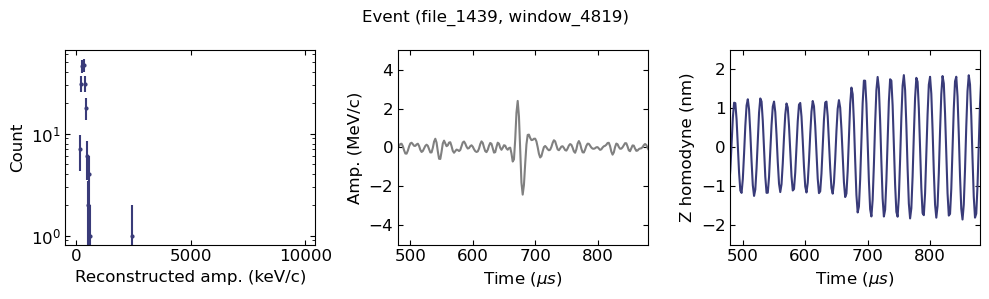

In [188]:
dataset = '20241210_1e-8mbar_8e_alignment2_long_nodrive'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241210_d_'

c_mv = 5.522e-08
amp2kev = 7054.1

window_length = 5000
bins = np.arange(0, 10000, 50)
bc = 0.5 * (bins[:-1] + bins[1:])

for i, j in events_after_cut_9[-10:]:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (23.6 hours), begins 2024-12-11 16:40:04.375087'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

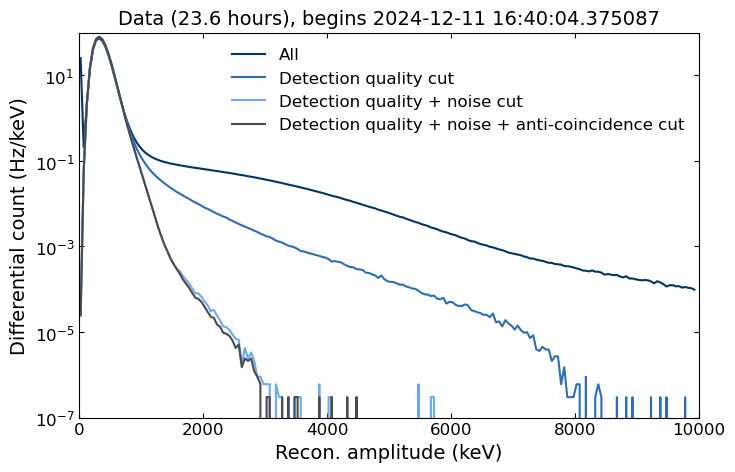

In [164]:
dataset = '20241211_1e-8mbar_8e_alignment2_long_nodrive'
data_dir = rf'/Users/yuhan/work/nanospheres/data/dm_data_processed/{dataset}'
data_prefix = r'20241211_d_'

bc, hhs_10, rates_10, n10, _ = utils.get_summed_rates(data_dir)
plot_rates(dataset, data_prefix, 1418, bc, rates_10)

Text(0, 0.5, 'Differential count (Hz/keV)')

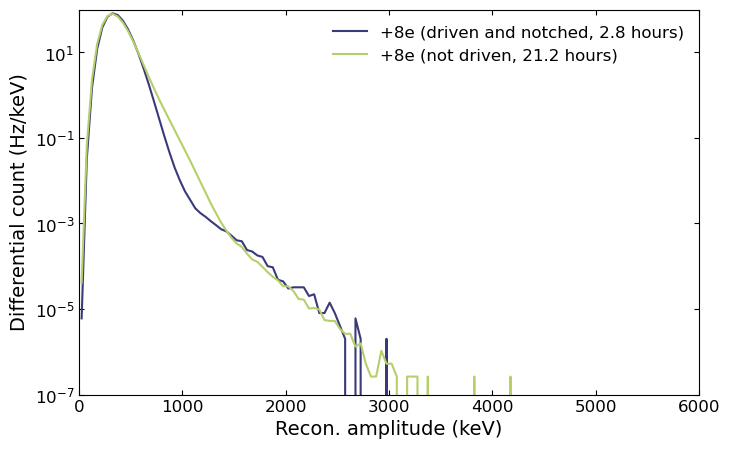

In [42]:
colors = plt.colormaps.get_cmap('tab20b').resampled(4).colors
fig, ax = plt.subplots(figsize=(8, 5))

n_search_per_win = (5000 - 150) / 25
time_per_search = 2e-6 * 25
scaling = n_search_per_win * time_per_search * 50  # because of the 50 keV bins

ax.plot(bc, rates_8[-1], '-', color=colors[0], label=f'+8e (driven and notched, 2.8 hours)', alpha=1)
ax.plot(bc, rates_9[-1], '-', color=colors[1], label=f'+8e (not driven, 21.2 hours)', alpha=1)

ax.legend(frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0, 6000)
ax.set_ylim(1e-7, 100)

ax.set_xlabel('Recon. amplitude (keV)')
ax.set_ylabel('Differential count (Hz/keV)')